# This notebook gives easy space for rehashing the big plot for the paper.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM

In [11]:
#---------------------------------------------------------
#Constants, taken from mass_SFR.py done by former students
#---------------------------------------------------------
Mag_sun_w1 = 3.254
Mag_sun_error_w1 = np.sqrt(0.008**2+0.02**2) #extra 0!!
Mag_sun_kt = 3.302
Mag_sun_error_kt = np.sqrt(0.008**2+0.02**2)
lum_sun = 3.828e26 #in W from NASA fact sheet
c = const.c.to('km/s').value #c in km/s
nu_3 = (c*1000)/(11.5608e-6) #in s^-1 from Table 1 in Jarrett et al. (2011) (link: http://iopscience.iop.org/article/10.1088/0004-637X/735/2/112/pdf)
zp_3 = 31.674 #in Jy Table 1 this WISE guide: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
a_3 = [1.13, 10.24] #Cluver14
a_4 = [0.82, 7.3] #Cluver14
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
h0_error = 2.4 # km/(Mpc*s)
parsec = 3.08567758e16 #m
jansky = 1e-26 #W/m^2/Hz
cosmo = FlatLambdaCDM(h0, Om0=0.262) # Shawn: to match cosmology used by Becky

In [12]:
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_041220.csv')
mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_candidates_041520.csv')
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_candidates_032020.csv')
#decals = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/decals_gama.csv')
#s4tm = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/s4tm_gama.csv')
#slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_gama.csv')

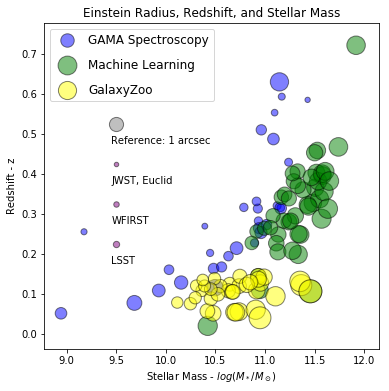

In [26]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
#ax.set_xlim(1.6, 3.1)
#ax.set_ylim(17, 21)

x1 = np.log10(spec.STELLAR_MASS)
y1 = spec.z1
c = spec.theta_e2
v1 = spec.theta_e2*200

x2 = np.log10(mac.STELLAR_MASS)
y2 = mac.Z
v2 = mac.theta_e*200

x3 = np.log10(zoo.STELLAR_MASS)
y3 = zoo.Z
v3 = zoo.theta_e*200

jwst = 0.1*200
lsst = 0.2*200
wfirst = 0.15*200

ax.scatter(x1, y1, s=v1, color='blue', marker='o', edgecolors = "k", label='GAMA Spectroscopy', alpha = 0.5)#, fillstyle = 'none')
ax.scatter(x2, y2, s=v2, color='green', marker='o', edgecolors = "k", label='Machine Learning', alpha = 0.5)
ax.scatter(x3, y3, s=v3, color='yellow', marker='o', edgecolors = "k", label='GalaxyZoo', alpha = 0.5)
ax.scatter(9.5, 0.525, s=200, color='gray', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9.5, 0.425, s=jwst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9.5, 0.325, s=wfirst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9.5, 0.225, s=lsst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)

plt.legend(loc='upper left', labelspacing=1.0, fontsize = 12)
#plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4], spacing='uniform') #, anchor=(0,1.5))
#plt.cbar.set_label('Einstein Radius - arcsec', fontsize=10)
plt.text(9.45,0.475,'Reference: 1 arcsec')
plt.text(9.45,0.375,'JWST, Euclid')
plt.text(9.45,0.275,'WFIRST')
plt.text(9.45,0.175,'LSST')

plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - z")
plt.title("Einstein Radius, Redshift, and Stellar Mass")

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_redshift_mass_nextgen.png')

In [27]:
spec.theta_e2.min()

0.14146061222670891

(0.0, 0.75)

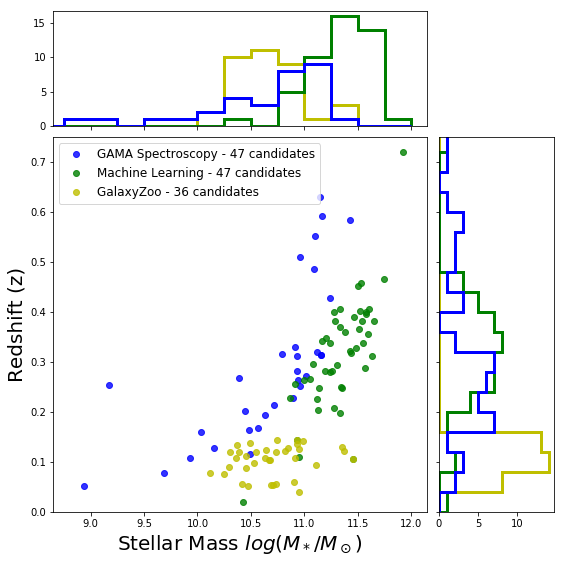

In [52]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z1, 'bo', alpha = 0.8, label='GAMA Spectroscopy - 47 candidates')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go', alpha = 0.8, label='Machine Learning - 47 candidates')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo', alpha = 0.8, label='GalaxyZoo - 36 candidates')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECALS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')


axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/041220_all_methods.png')

## Check for overlaps!

In [23]:
# 2 overlaps!
pd.merge(zoo, mac, on = 'GAMA_ID')

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,LENS_SCORE,STELLAR_MASS_x,Z_x,TOTAL_MASS,theta_e_x,Unnamed: 0_y,ID,RA_y,DEC_y,SCORE,STELLAR_MASS_y,Z_y,theta_e_y
0,5772,124486,179.72998,-2.51919,0.426190,8.541000e+10,0.1435,2.190000e+11,1.235660,24,2553.0,179.73003,-2.51895,28.0,8.541000e+10,0.1435,0.740108
1,11076,136604,175.87349,-1.74167,0.316451,2.866000e+11,0.1060,7.348718e+11,2.633636,32,1642.0,175.87355,-1.74164,58.0,2.866000e+11,0.1060,1.811693


In [24]:
pd.merge(mac, spec, on = 'GAMA_ID')

,Unnamed: 0_x,GAMA_ID,ID,RA_x,DEC_x,SCORE,STELLAR_MASS_x,Z_x,theta_e_x,Unnamed: 0_y,...,z2,spec_type,STELLAR_MASS_y,max_total_mass,theta_e_y,Z_y,max_stellar_mass_salpeter,max_stellar_mass_chabrier,Dz,theta_e2


In [25]:
pd.merge(zoo, spec, on = 'GAMA_ID')

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,LENS_SCORE,STELLAR_MASS_x,Z_x,TOTAL_MASS,theta_e_x,Unnamed: 0_y,...,z2,spec_type,STELLAR_MASS_y,max_total_mass,theta_e_y,Z_y,max_stellar_mass_salpeter,max_stellar_mass_chabrier,Dz,theta_e2


,Unnamed: 0,GAMA_ID,ID,RA,DEC,SCORE,STELLAR_MASS,Z,theta_e
0,0,3899011.0,2251.0,131.33397,-0.91563,64.0,3.294000e+11,0.4027,2.276871
1,1,376338.0,2660.0,132.98734,1.50468,30.0,3.034000e+11,0.3272,1.364552
2,2,323152.0,2967.0,130.54643,1.64325,30.0,8.277000e+11,0.7216,2.743990
3,3,663364.0,2669.0,140.35284,-0.97414,28.0,2.688000e+11,0.3221,2.321027
4,4,3629152.0,1933.0,135.88864,-0.97487,26.0,2.129000e+11,0.4059,1.320949
5,5,3575500.0,1906.0,129.23265,-1.57512,26.0,3.209000e+11,0.3652,1.185241
6,6,197972.0,2007.0,137.85838,-0.75280,24.0,3.551000e+11,0.3373,1.367670
7,7,3883690.0,2756.0,134.57492,-1.55142,22.0,1.362000e+11,0.2481,0.767594
8,8,3911769.0,1704.0,138.66089,-1.11639,20.0,1.740000e+11,0.2794,2.407686
9,9,371400.0,2275.0,131.20438,1.00064,18.0,2.021000e+11,0.2948,1.751501
